# Project: 探索TMDB电影数据

> 主要目的是以TMDB电影数据为例，学习如何熟练使用python中的pandas,numpy,matplotlib进行数据分析和数据可视化，最终回答一些感兴趣的问题。

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据清理</a></li>
<li><a href="#eda">探索性分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

### TMDB数据
- 数据库包含有电影名称，导演，主演，播放时间，投票等大量的基本信息；


### 感兴趣的问题:
> 1.  哪部电影利润最高，那部电影利润最低?
2. 上映电影数最多的年份?
3. 作品做多的前10位导演? 
4. 哪些因素对电影收入影响最大（相关性分析）?

In [85]:
# 用这个框对你计划使用的所有数据包进行设置
#   导入语句。

# 务必包含一个‘magic word’（带有“%”的***），以便将你的视图
#   与 notebook 保持一致。关于更多信息，请访问该网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import seaborn as sns



<a id='wrangling'></a>
## 数据整理

> 某些数据为null值，对数据分析没有帮助，因此需要进行数据清理，使得数据利于分析和可视化.

### 常规属性

In [86]:
# 加载数据并打印几行。进行这几项操作，来检查数据
#   类型，以及是否有缺失数据或错误数据的情况。
tmdb = pd.read_csv('tmdb-movies.csv')   

# print the concise summery of the dataset
reader.info()           

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [87]:
#打印前5行数据
tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


>**初步观察**
- 很多预算和收入的数据为0，不符合常识，应当是缺失的数据.
- 没有必要的货币单位，考虑到来源为TMDB，单位应当默认为美元($).

In [88]:
#计算null 值
tmdb.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [89]:
#使用0代替null便于计算
tmdb.fillna(0)
print()

### 数据清洗
> #### 需要清洗的数据有
1. 重复数据
2. 日期格式
3. 不需要的信息
4. 不符合会采纳格式的信息。票房预算为0的数据

**1. 删除重复的信息**

In [90]:
#使用'duplicated()筛选重复' 
sum(tmdb.duplicated())

1

In [91]:
#使用 'drop_duplicates()'发现并删除重复行
tmdb.drop_duplicates(inplace = True)

print("Afetr Removing Duplicate Values (Rows,Columns) : ",tmdb.shape)

Afetr Removing Duplicate Values (Rows,Columns) :  (10865, 21)


**2. 修正日期格式**

In [92]:
tmdb['release_date'] = pd.to_datetime(reader['release_date'])
tmdb['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

**3. 检查是否有不符合常识的信息或明显错误的数值.**
> 例如预算为0

In [93]:
# 检查预算为零和利润为零的数值
print("Rows With Zero Values In The Budget Column:",tmdb[(tmdb['budget']==0)].shape[0])
print("Rows With Zero Values In The Revenue Column:",tmdb[(tmdb['revenue']==0)].shape[0])

Rows With Zero Values In The Budget Column: 5696
Rows With Zero Values In The Revenue Column: 6016


<a id='eda'></a>
## 探索性数据分析EDA

> **提示**在你完成数据整理和清理之后，现在可以进行探索性数据分析了。你需要计算统计值，创建可视化图表，解决你在一开始的简介部分中提出的研究问题。我们推荐你采用系统化方法。一次只探索一个变量，然后探索变量之间的关系。



### 问题1：哪部电影利润最高，那部电影利润最低？

In [94]:
#首先计算每一部电影的利润（收入和预算之差）
#添加数据并命名为'Profit'
tmdb['Profit'] = tmdb['revenue'] - tmdb['budget']

In [95]:
#新建函数'find_maxmin'筛选利润最高和最低的电影.

def find_maxmin(x):
    #使用 'idmax' 和 'idmin' 筛选利润最高和最低的电影.
    high_index = tmdb[x].idxmax()
    
    min_index = tmdb[x].idxmin()
    
    high = pd.DataFrame(tmdb.loc[high_index,:])
    low = pd.DataFrame(tmdb.loc[min_index,:])

    print("Movie Which Has Highest "+ x + " : ",reader['original_title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",reader['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

#call 主程序
find_maxmin('Profit')

Movie Which Has Highest Profit :  Avatar
Movie Which Has Lowest Profit  :  The Warrior's Way


,1386,2244
id,19995,46528
imdb_id,tt0499549,tt1032751
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
homepage,http://www.avatarmovie.com/,http://www.iamrogue.com/thewarriorsway
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.


>利润最高的电影为**Avatar**,利润最低的电影是 **The Warrior's Way**. 

### 问题2：上映电影数最多的年份?

release_year
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64


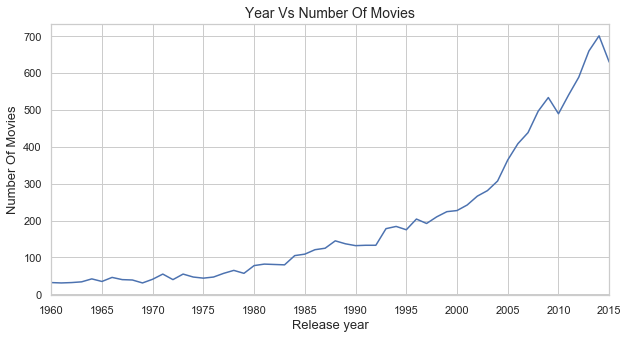

In [96]:
# 计算每一年上映电影的数量
data=tmdb.groupby('release_year').count()['id']
print(data.tail())

#作图
tmdb.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))

#设置图像格式
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
sns.set_style("whitegrid")

> **由图可知，2014年上映电影最多.**

### 问题 3 :   作品最多的前10位导演是哪些?

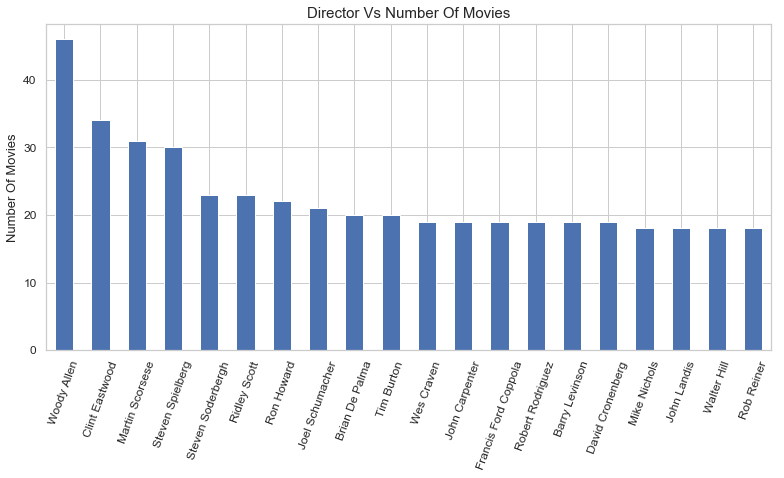

In [97]:
#定义函数.
def count_num(x):
    #concatenate all the numbers of any row.
    data_plot = tmdb[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the diretor and return.
    info = data.value_counts(ascending=False)
    return info

#使用'count_num' 计算导演电影数.
count_director_movies = count_num('director')

#绘图
count_director_movies.iloc[:20].plot(kind='bar',figsize=(13,6),fontsize=12)

#格式
plt.title("Director Vs Number Of Movies",fontsize=15)
plt.xticks(rotation=70)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")

> 由图可知，执导电影最多的导演是：**Woody Allen**.

### 问题4: 哪些因素对电影收入影响最大（相关性分析）?

In [98]:
info = pd.DataFrame(tmdb['revenue'].sort_values(ascending=False))
data_set = ['id','popularity','budget','original_title','cast','director','runtime','genres','vote_average','release_year']
for i in data_set:
    info[i] = reader[i]
info.head(3)

,revenue,id,popularity,budget,original_title,cast,director,runtime,genres,vote_average,release_year
1386,2781505847,19995,9.432768,237000000,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,7.1,2009
3,2068178225,140607,11.173104,200000000,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015
5231,1845034188,597,4.355219,200000000,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,7.3,1997


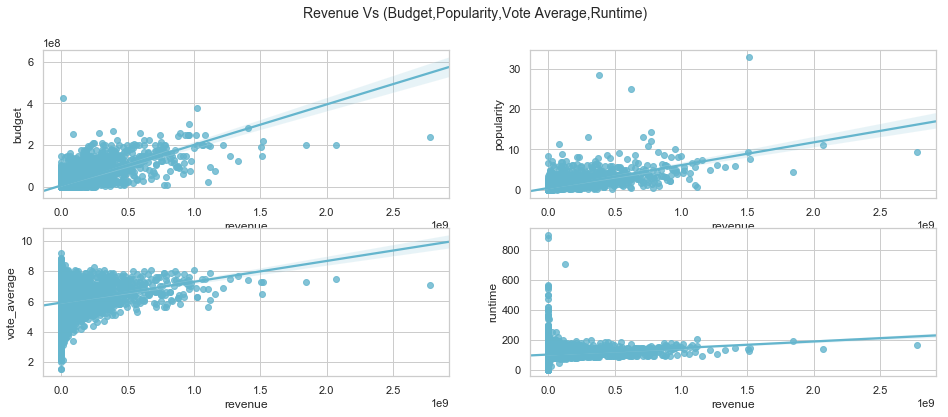

In [99]:
fig, axes = plt.subplots(2,2,figsize = (16,6))
fig.suptitle("Revenue Vs (Budget,Popularity,Vote Average,Runtime)",fontsize=14)
#info.plot(x = ['revenue'],y = ['budget'],kind = "scatter",ax = axes[0][0])
sns.regplot(x=tmdb['revenue'], y=tmdb['budget'],color='c',ax=axes[0][0])
sns.regplot(x=tmdb['revenue'], y=tmdb['popularity'],color='c',ax=axes[0][1])
sns.regplot(x=tmdb['revenue'], y=tmdb['vote_average'],color='c',ax=axes[1][0])
sns.regplot(x=tmdb['revenue'], y=tmdb['runtime'],color='c',ax=axes[1][1])
#axes.scatter(info['revenue'],info['vote_average'])
sns.set_style("whitegrid")

In [100]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

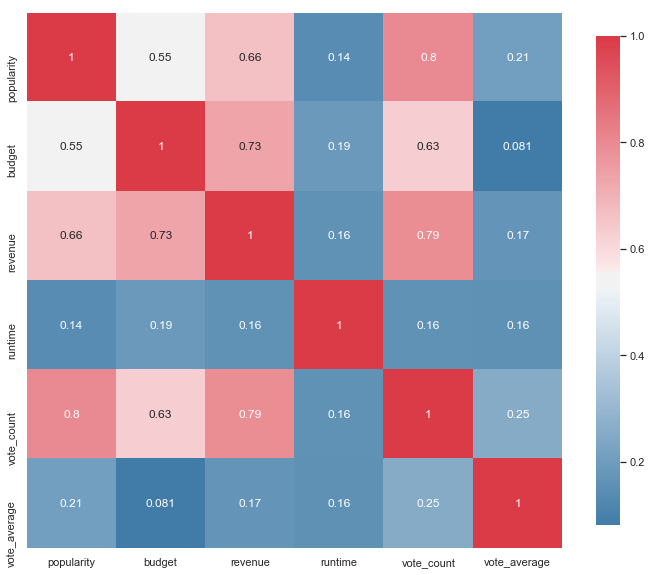

In [101]:
plot_correlation_map(reader[['popularity','budget','revenue','runtime','vote_count','vote_average']])

> **相关性分析如下,**
如图所示，收入主要受 budget,Popularity影响。相关系数分别是：0.69, 0.63.其他因素因为相关系数太小，例如 vote average 0.21, 可以认为与收入关系不大。


<a id='conclusions'></a>
## 结论

> 4个感兴趣的问题都得到了解答，利润最大的电影是 **Avatar**；**2014**年上映影片最多，执导电影最多的导演是：**Woody Allen**；与票房收入最相关的因素是**预算**。
> 局限性：这些结局的倾向具有一定的局限性，只是暂时的。因为部分电影存在缺失的预算和收入数据，因此我们得到的结论并不能100%真实反映电影市场的情况，但可以尽可能的反映趋势。


